In [7]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform
import random

# Load the dataset
data = pd.read_csv("Mall_Customers.csv")
X = data.iloc[:, [3, 4]].values  # Using only 'Annual Income' and 'Spending Score' columns

# K-means clustering
def kmeans(data, k, max_iters=100):
    num_samples, num_features = data.shape
    # Initialize centroids randomly
    centroids = data[np.random.choice(num_samples, k, replace=False)]
    for _ in range(max_iters):
        # Assign each data point to the nearest centroid
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        # Update centroids
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
        # Check for convergence
        if np.all(new_centroids == centroids):
            break
        centroids = new_centroids
    return centroids, labels

# K-medoids clustering
def kmedoids(data, k, max_iters=100):
    num_samples, num_features = data.shape
    # Initialize medoids randomly
    medoids_indices = np.random.choice(num_samples, k, replace=False)
    medoids = data[medoids_indices]
    for _ in range(max_iters):
        # Calculate pairwise distances between data points
        pairwise_distances = squareform(pdist(data, 'euclidean'))
        # Assign each data point to the nearest medoid
        labels = np.argmin(pairwise_distances[:, medoids_indices], axis=1)
        # Update medoids
        new_medoids = np.copy(medoids)
        for i in range(k):
            cluster_indices = np.where(labels == i)[0]
            cluster_distances = np.sum(pairwise_distances[cluster_indices][:, cluster_indices], axis=1)
            new_medoid_index = cluster_indices[np.argmin(cluster_distances)]
            new_medoids[i] = data[new_medoid_index]
        # Check for convergence
        if np.all(new_medoids == medoids):
            break
        medoids = new_medoids
    return medoids, labels

# Example usage
k = 5  # Number of clusters

# K-means
kmeans_centroids, kmeans_labels = kmeans(X, k)
print("K-means centroids:\n", kmeans_centroids)

# K-medoids
kmedoids_medoids, kmedoids_labels = kmedoids(X, k)
print("K-medoids medoids:\n", kmedoids_medoids)


K-means centroids:
 [[87.         18.63157895]
 [30.92857143 35.07142857]
 [86.53846154 82.12820513]
 [24.58333333  9.58333333]
 [48.48453608 56.93814433]]
K-medoids medoids:
 [[44 46]
 [87 13]
 [62 48]
 [33 81]
 [88 69]]


K-means centroids:
 [[24.58333333  9.58333333]
 [26.66666667 93.66666667]
 [86.53846154 82.12820513]
 [89.40625    15.59375   ]
 [28.18181818 33.27272727]
 [22.33333333 75.83333333]
 [37.42857143 65.        ]
 [47.09375    49.28125   ]
 [60.4        53.1       ]
 [66.42105263 40.        ]]
K-medoids medoids:
 [[ 54  46]
 [ 49  55]
 [ 63  48]
 [ 29  31]
 [ 20  79]
 [ 77  12]
 [103  17]
 [ 78  89]
 [ 71  75]
 [ 88  69]]
K-Means Silhouette Score: 0.39924304084655016
K-Means Inertia: 19746.911957660894
K-Medoids Silhouette Score: 0.26691917096963386


C:\Users\Vaidehi\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


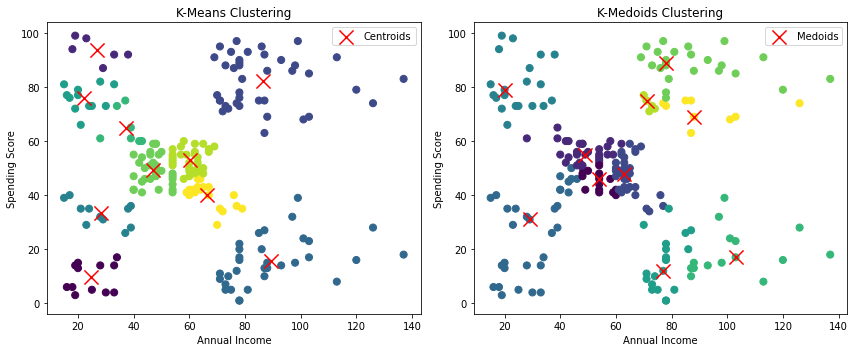

In [11]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("Mall_Customers.csv")
X = data.iloc[:, [3, 4]].values  # Using only 'Annual Income' and 'Spending Score' columns

# K-means clustering
def kmeans(data, k, max_iters=100):
    num_samples, num_features = data.shape
    # Initialize centroids randomly
    centroids = data[np.random.choice(num_samples, k, replace=False)]
    for _ in range(max_iters):
        # Assign each data point to the nearest centroid
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        # Update centroids
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
        # Check for convergence
        if np.all(new_centroids == centroids):
            break
        centroids = new_centroids
    return centroids, labels

# K-medoids clustering
def kmedoids(data, k, max_iters=100):
    num_samples, num_features = data.shape
    # Initialize medoids randomly
    medoids_indices = np.random.choice(num_samples, k, replace=False)
    medoids = data[medoids_indices]
    for _ in range(max_iters):
        # Calculate pairwise distances between data points
        pairwise_distances = squareform(pdist(data, 'euclidean'))
        # Assign each data point to the nearest medoid
        labels = np.argmin(pairwise_distances[:, medoids_indices], axis=1)
        # Update medoids
        new_medoids = np.copy(medoids)
        for i in range(k):
            cluster_indices = np.where(labels == i)[0]
            cluster_distances = np.sum(pairwise_distances[cluster_indices][:, cluster_indices], axis=1)
            new_medoid_index = cluster_indices[np.argmin(cluster_distances)]
            new_medoids[i] = data[new_medoid_index]
        # Check for convergence
        if np.all(new_medoids == medoids):
            break
        medoids = new_medoids
    return medoids, labels

# Example usage
k = 10 # Number of clusters

# K-means
kmeans_centroids, kmeans_labels = kmeans(X, k)
print("K-means centroids:\n", kmeans_centroids)

# K-medoids
kmedoids_medoids, kmedoids_labels = kmedoids(X, k)
print("K-medoids medoids:\n", kmedoids_medoids)

# Calculate silhouette score for K-Means
kmeans_silhouette_score = silhouette_score(X, kmeans_labels)

# Calculate inertia for K-Means
kmeans_inertia = KMeans(n_clusters=k).fit(X).inertia_

# Calculate silhouette score for K-Medoids
kmedoids_silhouette_score = silhouette_score(X, kmedoids_labels)

print(f"K-Means Silhouette Score: {kmeans_silhouette_score}")
print(f"K-Means Inertia: {kmeans_inertia}") 
print(f"K-Medoids Silhouette Score: {kmedoids_silhouette_score}")

# Lower inertia and higher silhouette score indicate better clustering
# A lower inertia indicates that the data points within each cluster are closer to each other
# Visualization
# 0 indicates that the data point is on or very close to the decision boundary between two neighboring clusters
plt.figure(figsize=(12, 5))

# Plot K-Means clusters
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.scatter(kmeans_centroids[:, 0], kmeans_centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()

# Plot K-Medoids clusters
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=kmedoids_labels, cmap='viridis', s=50)
plt.scatter(kmedoids_medoids[:, 0], kmedoids_medoids[:, 1], c='red', marker='x', s=200, label='Medoids')
plt.title('K-Medoids Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()

plt.tight_layout()
plt.show()
